In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
from gensim.models.word2vec import Word2Vec

In [155]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('models/bpo/{}.bin'.format(year)))
    for year in range(1720, 1960, 20)
])

In [156]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [157]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [158]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

poetry


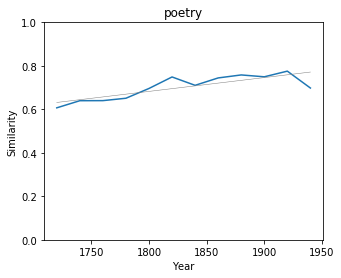

fiction


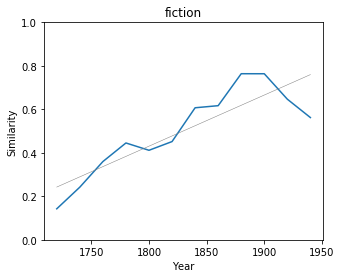

polite


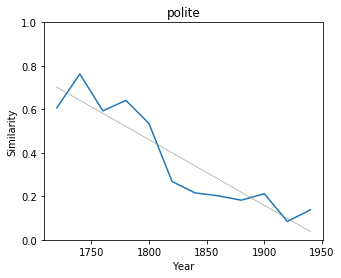

In [159]:
plot_cosine_series('literature', 'poetry')
plot_cosine_series('literature', 'fiction')
plot_cosine_series('literature', 'polite')

In [165]:
import enchant

dictionary = enchant.Dict('en_US')

def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar if dictionary.check(s[0])])
        
    return vocab

In [166]:
union_vocab = union_neighbor_vocab('literature')

In [167]:
data = []
for token in union_vocab:
    
    series = cosine_series('literature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [168]:
import pandas as pd

df1 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Increasing

In [169]:
pd.set_option('display.max_rows', 1000)

df1.sort_values('slope', ascending=False).head(50)

,token,slope,p
98,journalism,0.004263,0.000052
14,psychology,0.003640,0.000081
297,renaissance,0.003440,0.001242
283,anthropology,0.003316,0.000328
401,sociology,0.003243,0.000100
289,biology,0.003210,0.000165
345,folklore,0.003119,0.000631
378,technique,0.002996,0.001171
376,decadence,0.002940,0.000517
65,masterpieces,0.002929,0.000369


journalism


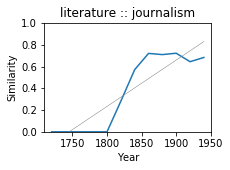

psychology


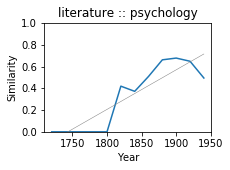

archaeology


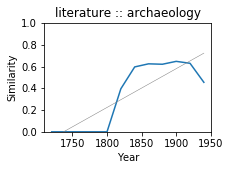

renaissance


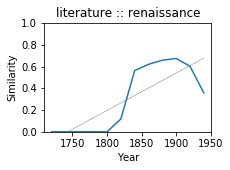

anthropology


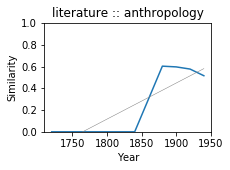

sociology


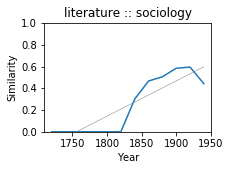

biology


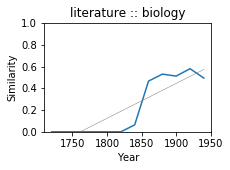

folklore


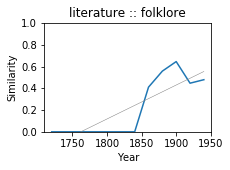

technique


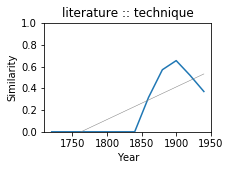

decadence


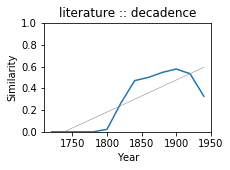

masterpieces


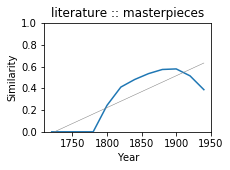

scholarship


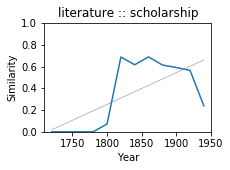

curriculum


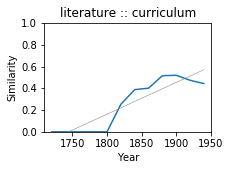

symbolism


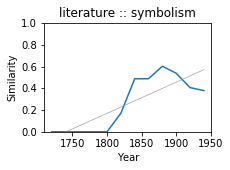

linguistic


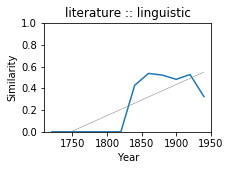

realism


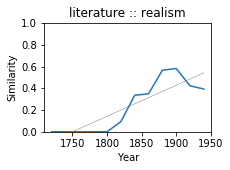

biographies


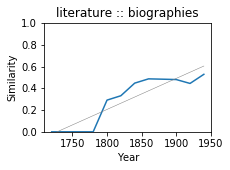

pictorial


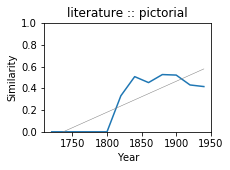

mysticism


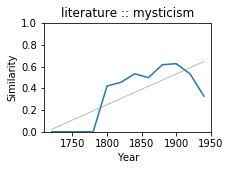

handbook


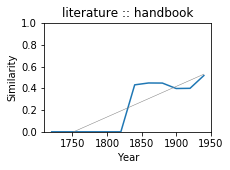

In [139]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)

# Decreasing

In [170]:
df1.sort_values('slope', ascending=True).head(50)

,token,slope,p
610,polite,-0.003020,0.000025
364,politer,-0.002901,0.000111
466,proficients,-0.002741,0.000138
60,mechanic,-0.002513,0.000014
421,encourager,-0.002496,0.000003
593,pharmacy,-0.002490,0.000025
257,stare,-0.002378,0.006064
539,literati,-0.002293,0.000955
183,agronomy,-0.002120,0.001476
77,ornamental,-0.001997,0.000027


polite


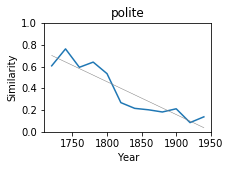

politer


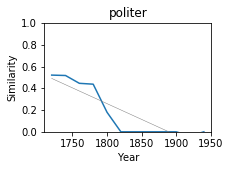

proficients


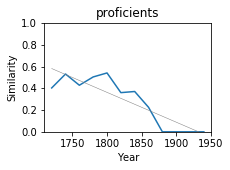

mechanic


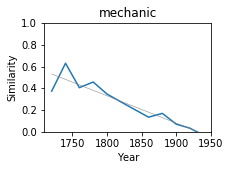

encourager


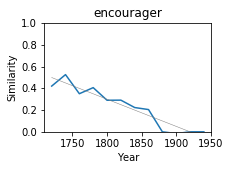

pharmacy


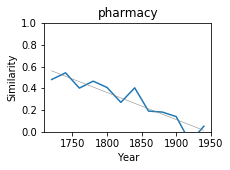

stare


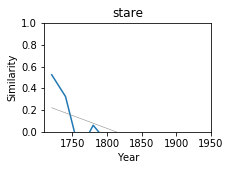

literati


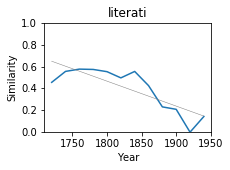

agronomy


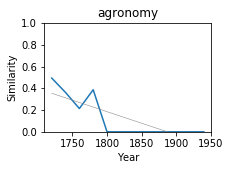

ornamental


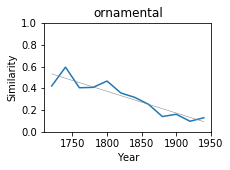

liberal


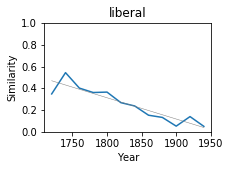

mercantile


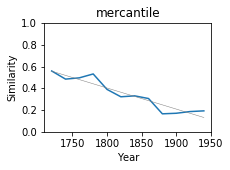

dunces


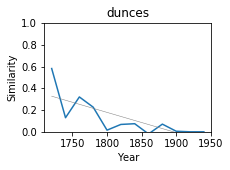

proficient


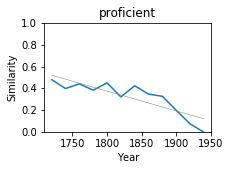

mechanics


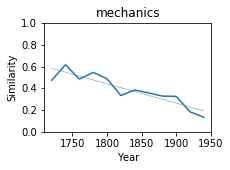

frugality


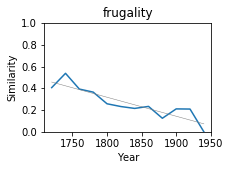

excelling


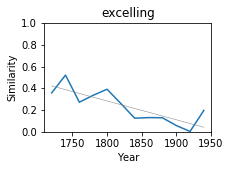

academical


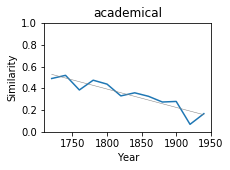

skilled


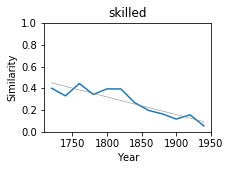

improvement


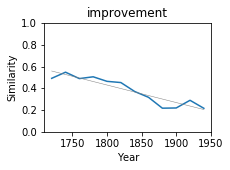

In [171]:
for i, row in df1.sort_values('slope', ascending=True).head(20).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)

In [173]:
def intersect_neighbor_vocab(anchor, topn=1000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar if dictionary.check(s[0])]))
        
    return set.intersection(*vocabs)

In [174]:
intersect_vocab = intersect_neighbor_vocab('literature')

In [175]:
data = []
for token in intersect_vocab:
    
    series = cosine_series('literature', token)
    fit = lin_reg(series)
    
    data.append((token, fit.params[1], fit.pvalues[1]))

In [176]:
import pandas as pd

df2 = pd.DataFrame(data, columns=('token', 'slope', 'p'))

# Intersected neighbors

In [178]:
df2.sort_values('slope', ascending=False)

,token,slope,p
16,art,0.001591,0.001347
0,culture,0.001178,0.005864
18,language,0.000973,0.000014
20,poetry,0.000636,0.001080
8,sculpture,0.000437,0.071661
11,historians,0.000272,0.316284
21,authors,0.000252,0.388738
7,architecture,0.000204,0.342242
42,drama,0.000203,0.539901
44,philosophy,0.000174,0.550760


art


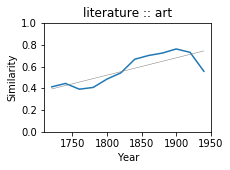

culture


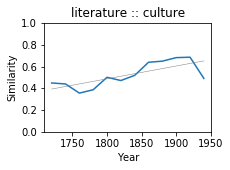

language


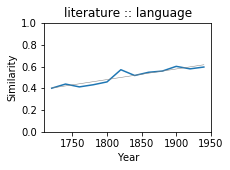

poetry


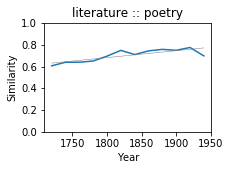

sculpture


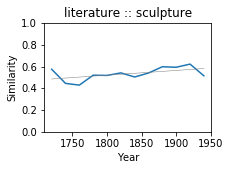

historians


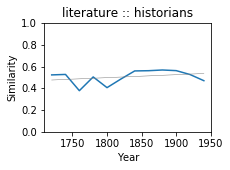

authors


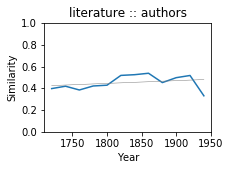

architecture


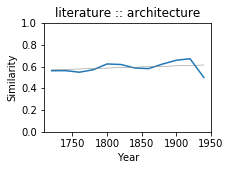

drama


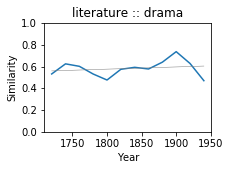

philosophy


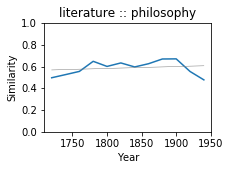

poetical


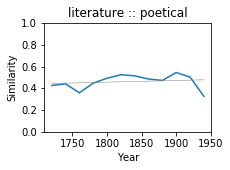

antiquarian


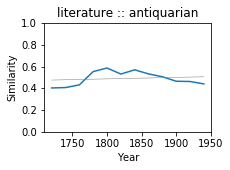

theology


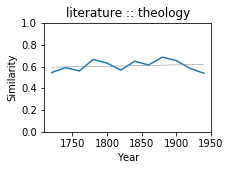

grammar


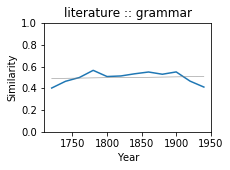

mythology


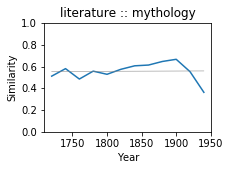

dramatic


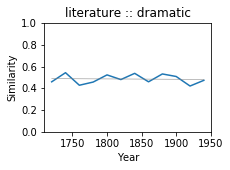

morals


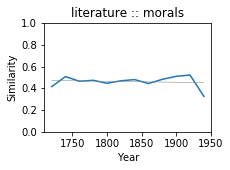

romance


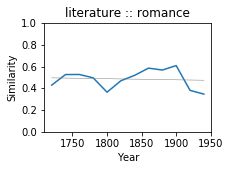

biographical


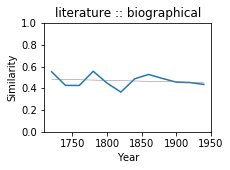

painting


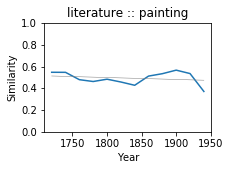

morality


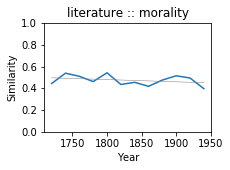

ethics


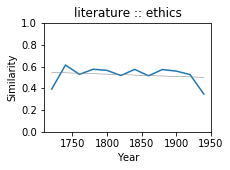

education


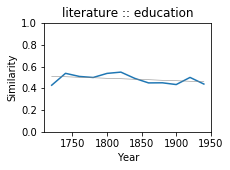

anatomy


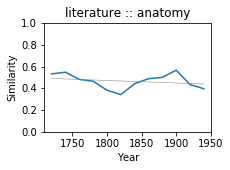

annals


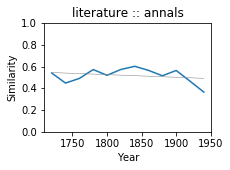

excellence


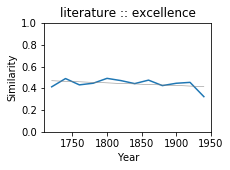

novels


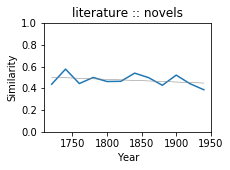

knowledge


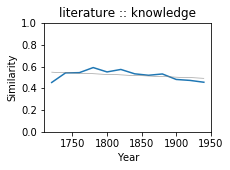

politics


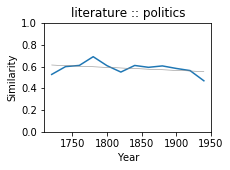

advancement


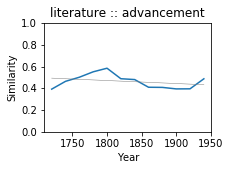

libraries


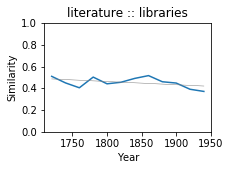

geography


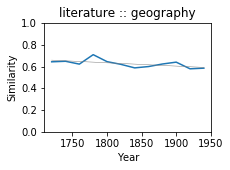

study


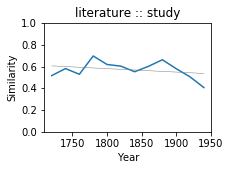

arithmetic


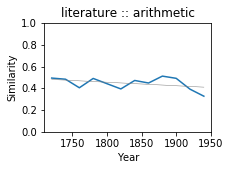

science


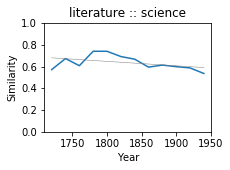

literary


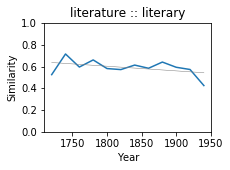

modern


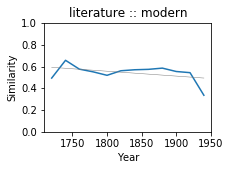

romances


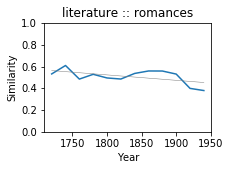

theological


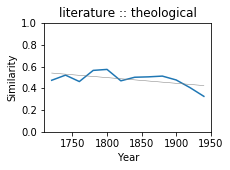

sciences


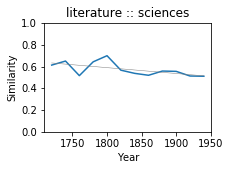

antiquities


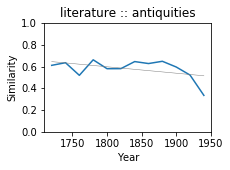

languages


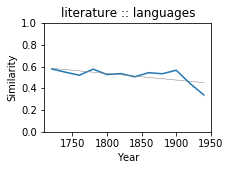

proficiency


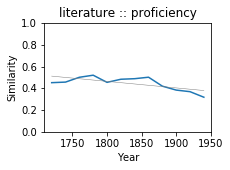

mathematics


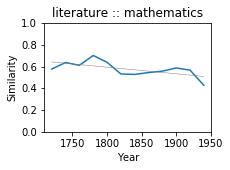

rhetoric


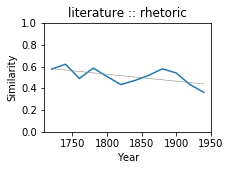

In [138]:
for i, row in df2.sort_values('slope', ascending=False).iterrows():
    plot_cosine_series('literature', row['token'], 3, 2)